This is the first in a series of posts that work through a machine learning problem from beginning to end. This series of posts will be broken down into 3 steps corresponding with my machine learning workflow.  
1. Exploratory Analysis 
2. Data Cleaning 
3. Feature Engineering
4. Model Training


Before we delve into the Exploratory Analysis I always like to take a minute to summarize the problem description and problem summary to ensure I have a solid high level understanding of the task before deliving into the data.

### Problem Description & Summary
Many real-estate investment trusts (REITs) use third party appraisal services to help them decide if a property is worth investing in or not. However the third party appraisal process is prone to a significant amount of human error as value estimates are highly dependent on individual experience and expertise with price estimates routinely off by eighty thousand dollars  or more. Having a trained model to predict housing transaction prices with a less than eighty thousand dollar error would be a real asset to an REIT. Since we will be trying to predict the numerical value of a single target variable this problem is best suited for a regression analysis.
<pre style="font-size: 15px !important; text-align:center">
Deliverable: <strong>Trained Model File</strong>
Machine learning task: <strong>Regression</strong>
Target variable: <strong>Transaction Price</strong>
Win condition: <strong>Avg. Prediction Error < $80,000</strong></pre>
<br><hr id="toc">
### The Breakdown...

In this module, part 1 of 4, I'm going to go through the essential exploratory analysis steps:
1. [Basic information](#basic)
2. [Distributions of numeric features](#numeric)
3. [Distributions of categorical features](#categorical)
4. [Segmentations](#segmentations)
5. [Correlations](#correlations)

Along the way, I'll note the practical implications of the findings.

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program. Then I'll load the dataset and put it into a pandas DataFrame.

In [1]:
# Computing libraries 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load real estate data from CSV
df = pd.read_csv('real_estate_data.csv')

Now we're ready to jump into exploring the data!

<br id="basic">
### 1. Basic information

Let's begin by displaying the dataset's basic information. I like to start with the dataframe dimensions, datatypes, head, and tail of the dataframe. Starting with the dataframe dimensions allows me to check that our observations to features ratio is large enough that I don't have to worry about insufficient data. Checking data types allows me to see how many numerical vs categorical features I have. Finally, I can do a quick sanity check on the head and tail to make sure I don't have any obviously corrupted data. 

From exploring the basic info below nothing particularly egregious jumps out at me. I don't see much porrly formatted or corrupted data. However, <code style="color:steelblue">'basement'</code> and <code style="color:steelblue">'roof'</code> features have missing data and look like they may need to be categorical features instead of numerical ones. Let's move onto the next step to see what more we can learn about this data set...

In [3]:
# Dataframe dimensions
df.shape

(1883, 26)

In [4]:
# Column datatypes
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [5]:
# Display first 5 rows of df
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [6]:
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


By the way, as a quick exercise to actually get the **feature names** to iterate through, I'm going to use a boolean filter on df.types combined with using the <code style="color:steelblue">.index</code> attribute. The ability to select feature names based on some condition (instead of manually typing out each one) will be quite useful later.

In [7]:
# Loop through categorical feature names and print each one
for feature in df.dtypes[df.dtypes == 'object'].index:
    print(feature)

property_type
exterior_walls
roof


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="numeric">
### 2. Distributions of numeric features

I find one of the most enlightening data exploration tasks is plotting the distributions of the features. I start with a histogram grid for all the numeric features, making sure to format things so the figure is easy to read. Then I make a heatmap to see which numerical features are most highly correlated with each other. Finally, I print the summary statistics for the numerical features to make sure the numbers make sense for the categories.

Aside from the issues with <code style="color:steelblue">'basement'</code> and <code style="color:steelblue">'roof'</code> mentioned earlier the main thing that I notice is that the amenities that make a neighborhood desireable to live are in fairly short supply. I suppose that scarcity is part of why they're so valuable to the overall reputation of an area.

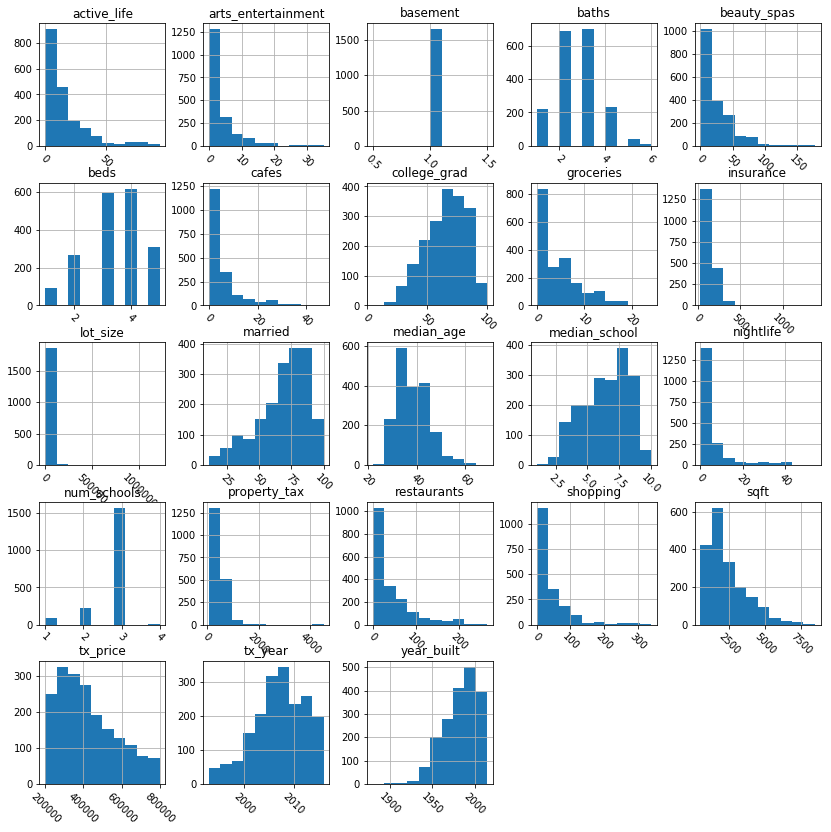

In [8]:
# Plot histogram grid
df.hist(figsize=(14,14), xrot=-45)
# Clear the text "residue"
plt.show()

In [9]:
# Summarize numerical features
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="categorical">
### 3. Distributions of categorical features

Next, I'm going to take a look at the distributions of the categorical features. I started with the summary statistics to see if there were any obvious gaps in the data. Then I used a loop to produce a bar graph for all 3 categorical features. 

In the categorical feature description I noticed that there is some missing data for the <code style="color:steelblue">'exterior_walls'</code> and <code style="color:steelblue">'roof'</code> features. I'll have to decide how to deal with this missing data in Data Analysis & Feature Engineering. For both <code style="color:steelblue">'exterior_walls'</code> and <code style="color:steelblue">'roof'</code> features I also notice lots of sub-categories with sparse data I'll want to consolidate or drop if possible to be able to build a strong model. I'll have to decide if it makes sense to combine any of these categories or elimiate them from my analysis completely in Data Analysis & Feature Engineering.

In [10]:
# Summarize categorical features
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


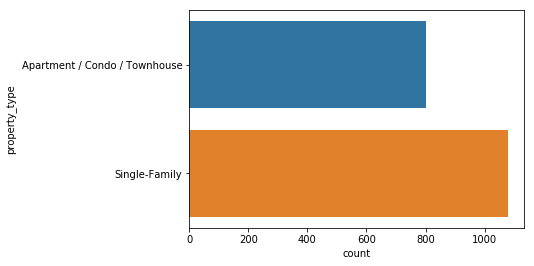

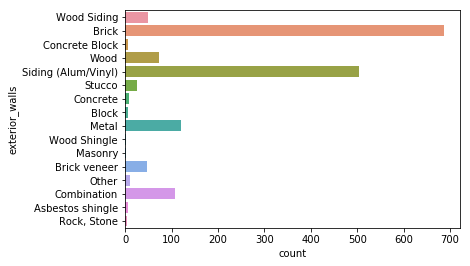

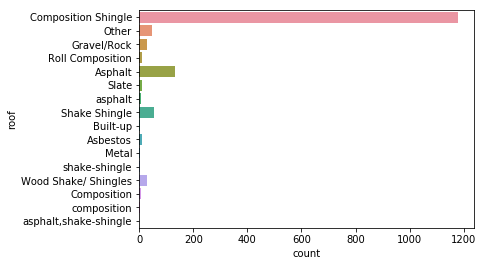

In [11]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="segmentations">
### 4. Segmentations
Next, let's create some segmentations. Segmentations are powerful ways to cut the data to observe the relationship between **categorical features** and **numeric features**. As this is a regression problem, I'm going to focus on the boxplot to show the relationship between categorical and numerical features in an efficient way. I start by plotting the <code style="color:steelblue">'tx_price'</code> by <code style="color:steelblue">'property type'</code>. Then I plot <code style="color:steelblue">'sqft'</code> by <code style="color:steelblue">'property type'</code>. Finally, I use a <code style="color:steelblue">.group_by()</code> to show the mean and standard deviation within each class by <code style="color:steelblue">'property type'</code>.

In the first boxplot I see that the average transaction price for apartment/condo/townhouse is lower than for single-family homes. However, there are some extreme outliers at the top end of the transaction price window we're looking at. Looking at the next plot we see there is significantly smaller variance in square footage values for the apartment/condo/townhouse category compared to single-family homes, which makes intuitive sense. This visual data is numerically confirmed by the <code style="color:steelblue">group_by()</code> chart.

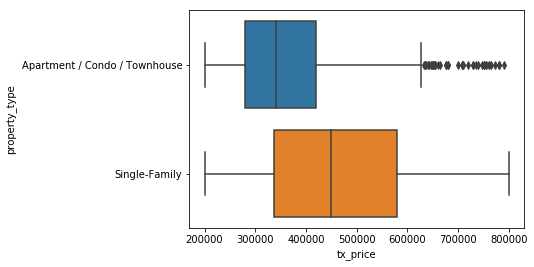

In [12]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(x='tx_price', y='property_type', data=df)

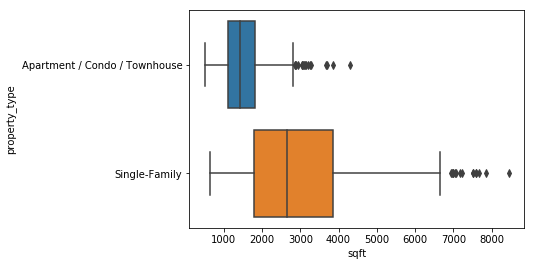

In [13]:
# Segment sqft by sqft and property_type distributions
sns.boxplot(x='sqft', y='property_type', data=df)

In [14]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby('property_type').agg([np.mean,np.std])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="correlations">
### 5. Correlations

Finally, let's take a look at the relationships between **numeric features** and **other numeric features**. I'll start by creating a <code style="color:steelblue">correlations</code> dataframe from <code style="color:steelblue">df</code> and making a heatmap from it. As you can see below, due to the large number of features the heatmap is a bit busy and not quite so user-friendly. So I'm going to take a minute to do some formatting to see what I can do to improve this feature. 

In [15]:
# Calculate correlations between numeric features
correlations = df.corr()

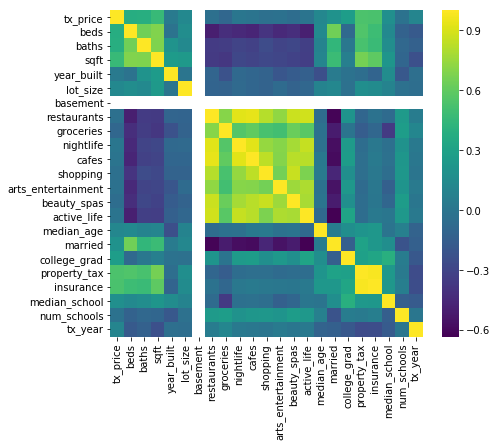

In [16]:
# Make the figsize 7 x 6
plt.figure(figsize=(7,6))
# Plot heatmap of correlations
sns.heatmap(correlations, cmap='viridis')

When plotting a heatmap of correlations, it's often helpful to do four things:
1. Change the background to white. This way, 0 correlation will show as white
2. Annotate the cell with their correlations values
3. Mask the top triangle (less visual noise)
4. Drop the legend (colorbar on the side)

Note that I multiply the correlation values by 100 and then format them to display only as whole numbers to make the scaling easier to understand and interpret. Next I add a mask to hide the redundant upper triangle of the heatmap, remove the sclaing bar and adjust the figure size accordingly. 

Now that we've done all this formatting work it's quite straighforward to see that the numerical features which have the largest influence on <code style="color:steelblue">'tx_price'</code> are, in order, <code style="color:steelblue">'property_tax'</code>,<code style="color:steelblue">'insurance'</code>, and <code style="color:steelblue">'sqft'</code>, followed by <code style="color:steelblue">'beds'</code>, and <code style="color:steelblue">'baths'</code>. Interestingly, while the neighborhood amenities I discussed earlier are highly correlated with each other, they are slightly negatively correlated with <code style="color:steelblue">'tx_price'</code>. While neighborhoods with ammenities are desirable to a certain subset of the home-buyer population traditional predictors of home value such as <code style="color:steelblue">'property_tax'</code>,<code style="color:steelblue">'insurance'</code>, and <code style="color:steelblue">'sqft'</code> are much stronger drivers of real estate value. As a future exploration it would certainly be interesting to add data about homebuyer demographics and neighborhood classification preferences.

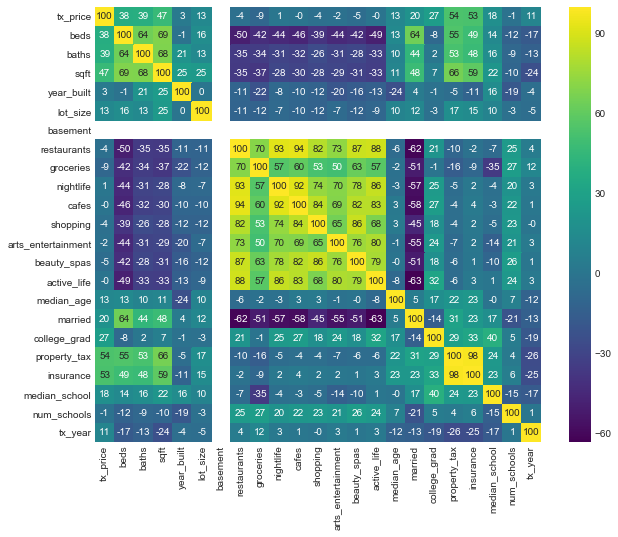

In [17]:
# Change color scheme
sns.set_style('white')
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(correlations*100, annot=True, fmt='.0f', cmap='viridis')

In [18]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

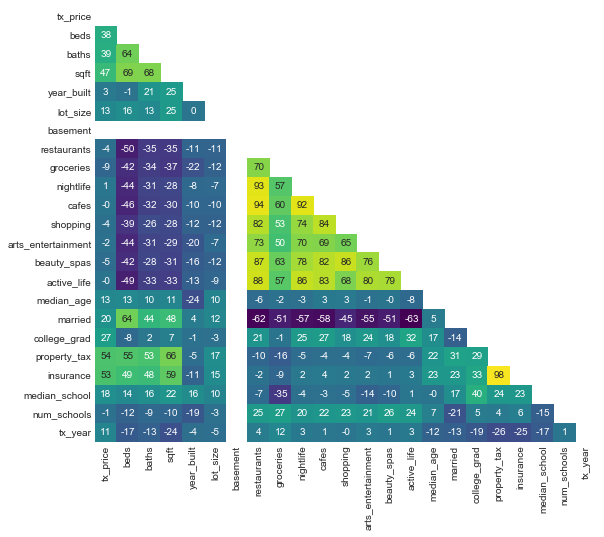

In [19]:
# Make the figsize 9 x 8
plt.figure(figsize=(9,8))
# Plot heatmap of correlations
sns.heatmap(correlations*100,annot=True, fmt='.0f', mask=mask, cmap='viridis', cbar=False)

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br>
## Next Steps

As a reminder, here are a few things I did in this module:
* Explored basic information about your dataset.
* Plotted distributions of numeric and categorical features.
* Segmented the dataset by <code style="color:steelblue">'property_type'</code>.
* Visualized a heatmap of feature correlations.

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>